## Importing libraries

In [1]:
import re
import pickle
import numpy as np
import pandas as pd

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer

# splitting data into train and test data.
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

# Creating 4 different types of model of our sentimental analysis probelms.
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report 

### Prepping the dataset

In [2]:
DATASET_ENCODING = "ISO-8859-1"

In [3]:
dataset = pd.read_csv('C:/Users/anjun/Desktop/Sem2/7072/dataset/twitter/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1')

In [4]:
dataset

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
# let's give column names
dataset.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

In [6]:
dataset

,sentiment,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
# let's remove unnecessary columns
dataset.drop(['id', 'date', 'query', 'user'], axis=1, inplace=True)


In [8]:
dataset

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


In [9]:
# replace values in sentiment column
dataset['sentiment'] = dataset['sentiment'].replace(4, 1)
dataset

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,1,Just woke up. Having no school is the best fee...
1599995,1,TheWDB.com - Very cool to hear old Walt interv...
1599996,1,Are you ready for your MoJo Makeover? Ask me f...
1599997,1,Happy 38th Birthday to my boo of alll time!!! ...


In [10]:
# let's remove rows with missing values
dataset.dropna(inplace=True)

In [11]:
# count the number of rows in the dataset
dataset.shape

(1599999, 2)

In [12]:
# let's count the number of positive and negative tweets
dataset['sentiment'].value_counts()

1    800000
0    799999
Name: sentiment, dtype: int64

In [13]:
# let's name 0 as negative and 1 as positive
# dataset['sentiment'] = dataset['sentiment'].replace(0, 'Negative')
# dataset['sentiment'] = dataset['sentiment'].replace(1, 'Positive')


In [14]:
# let's count the number of positive and negative tweets
dataset['sentiment'].value_counts()

1    800000
0    799999
Name: sentiment, dtype: int64

In [15]:
# let's store this data in a list
text, sentiment = list(dataset['text']), list(dataset['sentiment'])


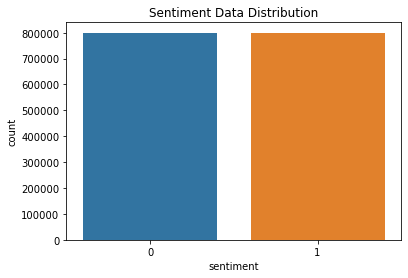

In [16]:
# let's plot a bar chart to show the number of positive and negative tweets
sns.countplot(x='sentiment', data=dataset)
plt.title('Sentiment Data Distribution')
plt.show()

In [17]:
dataset

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,1,Just woke up. Having no school is the best fee...
1599995,1,TheWDB.com - Very cool to hear old Walt interv...
1599996,1,Are you ready for your MoJo Makeover? Ask me f...
1599997,1,Happy 38th Birthday to my boo of alll time!!! ...


## Text Preprocessing

In [18]:
# let's define a dictionary to store all the emoticons
emoticons = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad',  '$_$': 'greedy', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [19]:
# let's define a list of all the stopwords
stopwordsList = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [20]:
# let's define a function to preprocess the tweets
def preprocess(tweet_data):
    processedText = []

    # Create the wordnet lemmatizer
    lemmatizer = WordNetLemmatizer()

   
    # Regex patterns to remove
    URLpattern = r'((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)'  # URLs
    Userpattern = '@[^\s]+'  # Removing @mentions
    Alphapattern = r'[^a-zA-Z0-9]'  # # Remove all non-alphanumeric characters
    Repeatingpattern = r'(.)\1\1+'  # Repeating characters

    # Remove patterns from the tweet
    for tweet in tweet_data:
        # Convert to lower case
        tweet = tweet.lower()

        # Replace all URls with 'URL'
        tweet = re.sub(URLpattern, 'URL', tweet)

        # Replace all @Usernames with 'USER'
        tweet = re.sub(Userpattern, 'USER', tweet)

        # Replace all non-alphanumeric characters with a space
        tweet = re.sub(Alphapattern, ' ', tweet)

        # Replace repeating characters by 2 letters
        tweet = re.sub(Repeatingpattern, r'\1\1', tweet)

        # Replace all emoticons
        for emoticon in emoticons.keys():
            tweet = tweet.replace(emoticon, "EMOTICON" + emoticons[emoticon]) 
        
        # Remove stopwords
        tweet_words = ''
        for words in tweet.split():
            # Check if the word is a stopword
            if words not in stopwordsList:
                # Lemmatize the word
                words = lemmatizer.lemmatize(words)
                tweet_words += (words + ' ' )   
        processedText.append(tweet_words)

    return processedText  

            

In [42]:
# let's find the processing time for the preprocessing function
import time
start_time = time.time()
preprocessedText = preprocess(text)
print('Time taken to preprocess the tweets: %s seconds' % (time.time() - start_time))


Time taken to preprocess the tweets: 0.0019521713256835938 seconds


## Data Visualization:
### Word-Cloud for Positive tweets

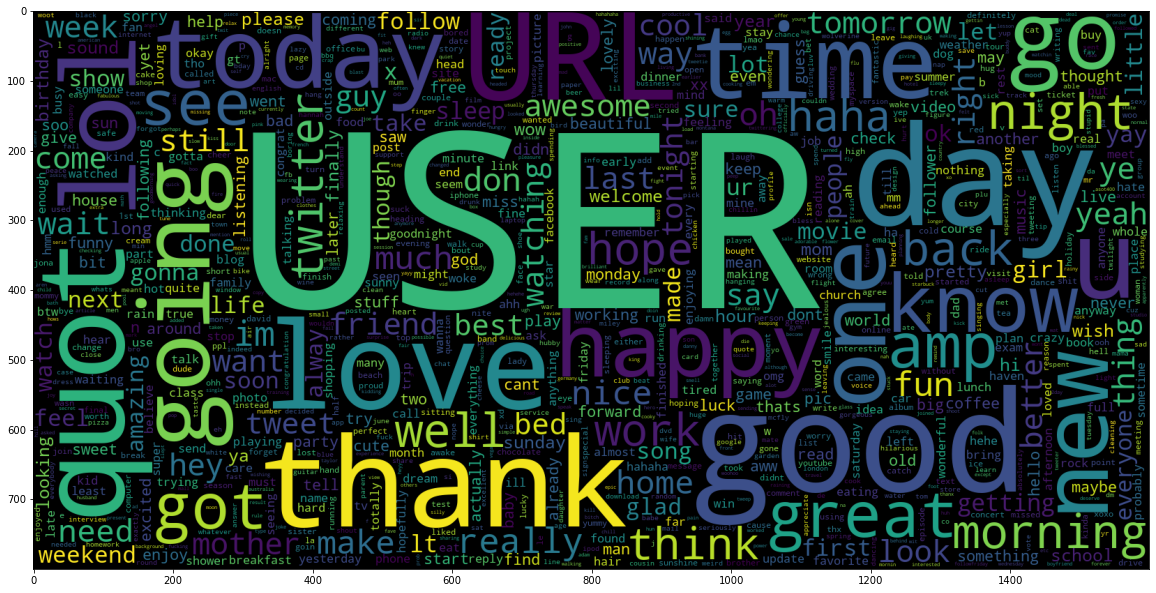

In [22]:
# Word-Cloud for Positive tweets
data_pos = preprocessedText[800000:1000000]
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 1000, width = 1600, height = 800, collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

### Word-Cloud for Negative tweets

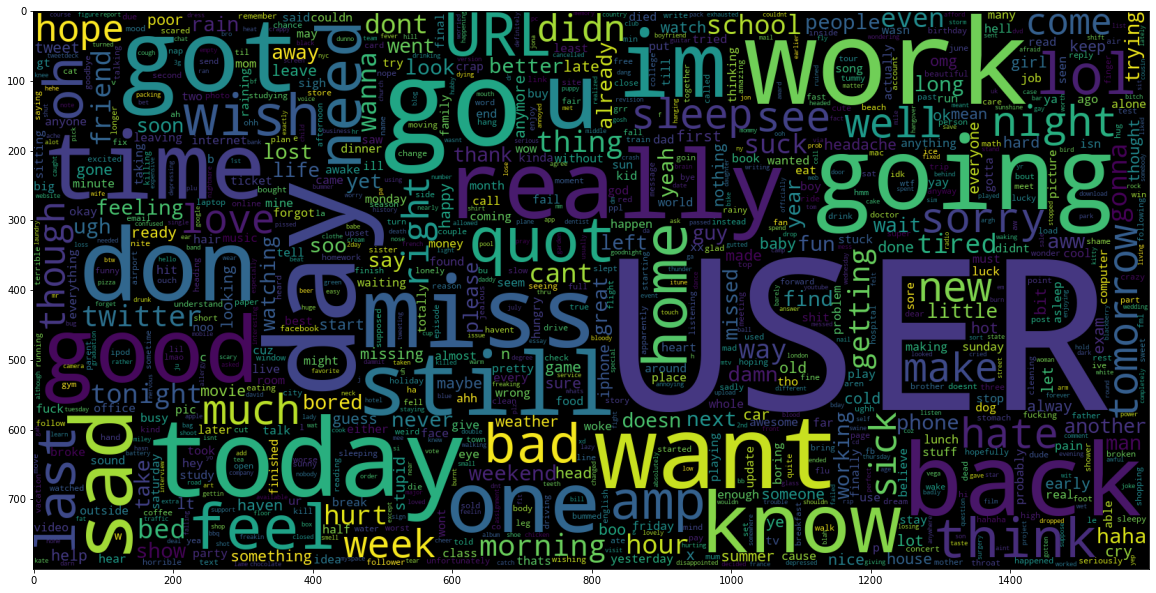

In [23]:
# Word-Cloud for Negative tweets
data_neg = preprocessedText[:800000]
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 1000, width = 1600, height = 800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

### Train-Test Split

In [24]:
# splitting data into train and test data.
X_train, X_test, y_train, y_test = train_test_split(preprocessedText, sentiment, test_size=0.05, random_state=26105111) 

### TF-IDF

In [25]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [26]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

### Model Evaluation

In [27]:
# Evaluation Model Function

from sklearn.metrics import confusion_matrix, classification_report 

def evaluate_model(model):
    # predict the test set results
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix
    categories = ['Negative', 'Positive']
    groups = ['True Negative ', 'False Negative', 'False Positive', 'True Positive']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(groups,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Confusion Matrix')
    
    # plot roc curve
    from sklearn.metrics import roc_curve, auc
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.figure(figsize=(10,10))
    plt.title('ROC Curve')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.2])
    plt.ylim([-0.1, 1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


### Multinomial Naive Bayes

In [43]:
# Create a Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict the test set results
y_pred = clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
# print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy of the model: %.2f' % (accuracy_score(y_test, y_pred) * 100)+'%')

Accuracy of the model: 79.43%


Multinomial Naive Bayes
--------------------
              precision    recall  f1-score   support

           0       0.79      0.80      0.79     40100
           1       0.79      0.79      0.79     39900

    accuracy                           0.79     80000
   macro avg       0.79      0.79      0.79     80000
weighted avg       0.79      0.79      0.79     80000



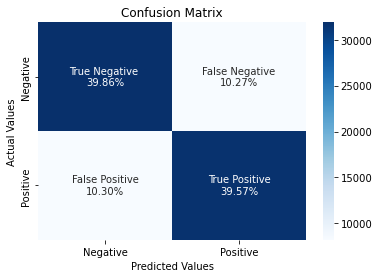

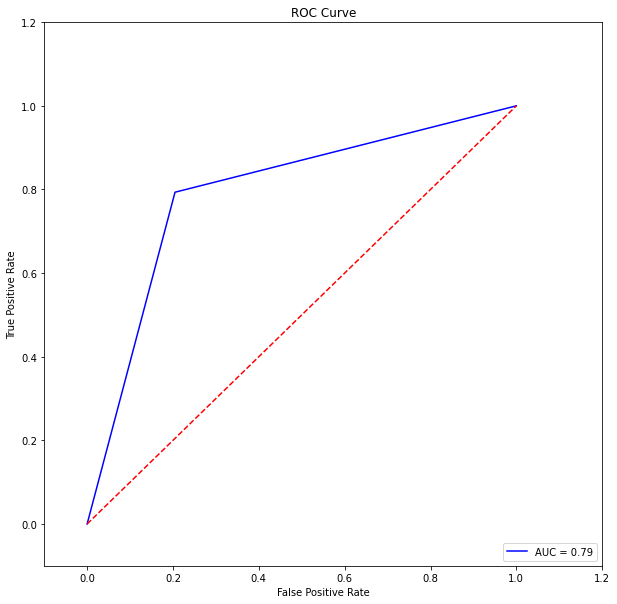

Accuracy of the model: 79.43%


In [44]:
# Evaluating the models

# Multinomial Naive Bayes
print('Multinomial Naive Bayes')
print('--------------------')
evaluate_model(clf)
y_pred0 = clf.predict(X_test)
print('Accuracy of the model: %.2f' % (accuracy_score(y_test, y_pred0) * 100)+'%')



### Bernoulli Naive Bayes classifier

Bernoulli Naive Bayes
--------------------
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     40100
           1       0.79      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



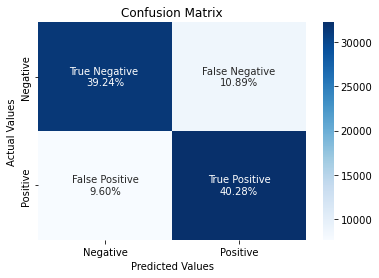

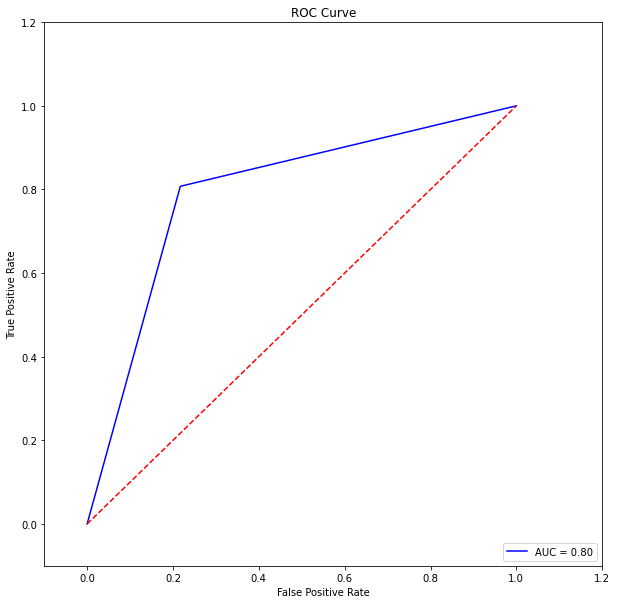

Accuracy of the model: 79.52%


In [45]:
# Bernoulli Naive Bayes classifier
NBModel = BernoulliNB()
NBModel.fit(X_train, y_train)
print('Bernoulli Naive Bayes')
print('--------------------')
evaluate_model(NBModel)
y_pred1 = NBModel.predict(X_test)
print('Accuracy of the model: %.2f' % (accuracy_score(y_test, y_pred1) * 100)+'%')

### Logistic Regression classifier

Logistic Regression
--------------------
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     40100
           1       0.80      0.83      0.81     39900

    accuracy                           0.81     80000
   macro avg       0.81      0.81      0.81     80000
weighted avg       0.81      0.81      0.81     80000



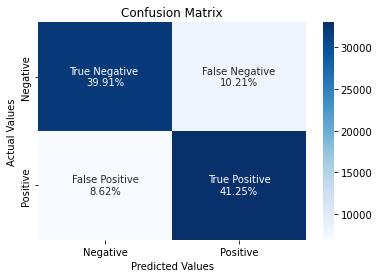

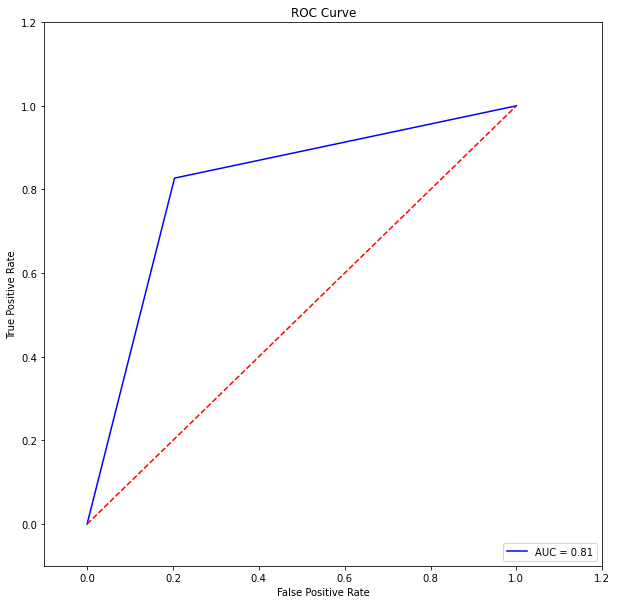

Accuracy of the model: 81.17%


In [41]:
# Logistic Regression classifier
LRmodel = LogisticRegression(C= 2, solver='lbfgs', max_iter=1000, n_jobs=-1)  
LRmodel.fit(X_train, y_train)
print('Logistic Regression')
print('--------------------')
evaluate_model(LRmodel)
y_pred2 = LRmodel.predict(X_test)
print('Accuracy of the model: %.2f' % (accuracy_score(y_test, y_pred2) * 100)+'%')

### Linear SVC classifier

Linear SVC
--------------------
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.79      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



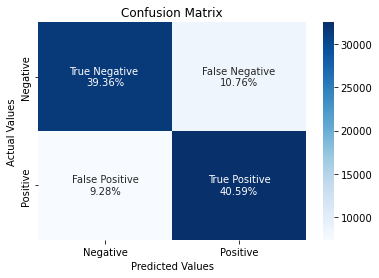

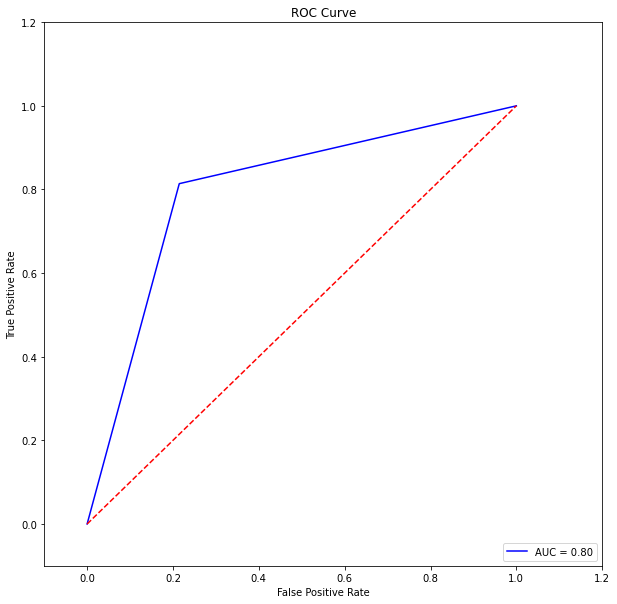

Accuracy of the model: 79.96%


In [32]:
# Linear SVC classifier
svc = LinearSVC()
svc.fit(X_train, y_train)
print('Linear SVC')
print('--------------------')
evaluate_model(svc)
y_pred3 = svc.predict(X_test)
print('Accuracy of the model: %.2f' % (accuracy_score(y_test, y_pred3) * 100)+'%')

### Saving the model using pickle library in a file variable

In [46]:
# Saving the model using pickle library in a file variable
import pickle
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectorizer, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

file = open('Sentiment-BNB.pickle','wb')
pickle.dump(NBModel, file)
file.close()
        

In [47]:
# load the model from the file
def load_models():
    '''
    Replace '..path/' by the path of the saved models.
    '''
    
    # Load the vectoriser.
    file = open('C:/Users/anjun/Desktop/Sem2/7072/dataset/twitter/vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('C:/Users/anjun/Desktop/Sem2/7072/dataset/twitter/Sentiment-LR.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

In [48]:
# define a function to predict the sentiment of a new tweet
def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectorizer.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['tweet','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [49]:
if __name__=="__main__":
    # Loading the models.
    #vectoriser, LRmodel = load_models()
    
    # Text to classify should be in a list.
    text = input("Enter your tweet: ")
    print('---------------------------------')
    df = predict(vectorizer, LRmodel, [text])
    print('Tweet by the user:',df.iloc[0]['tweet'] +'\n'+ 'Sentiment of the tweet:', df.iloc[0]['sentiment'])

---------------------------------
Tweet by the user: hello sunshine! :)
Sentiment of the tweet: Positive


In [50]:
# how to give multiple tweets at once
text = input("Enter your tweet: ")
text2 = input("Enter your tweet: ")
text3 = input("Enter your tweet: ")
text4 = input("Enter your tweet: ")
# Predict the sentiment of the tweets.
df = predict(vectorizer, LRmodel, [text, text2, text3, text4])
print('---------------------------------')
print('Tweet by the user:',df.iloc[0]['tweet'] +'\n'+ 'Sentiment of the tweet:', df.iloc[0]['sentiment'])
print('---------------------------------')
print('Tweet by the user:',df.iloc[1]['tweet'] +'\n'+ 'Sentiment of the tweet:', df.iloc[1]['sentiment'])
print('---------------------------------')
print('Tweet by the user:',df.iloc[2]['tweet'] +'\n'+ 'Sentiment of the tweet:', df.iloc[2]['sentiment'])
print('---------------------------------')
print('Tweet by the user:',df.iloc[3]['tweet'] +'\n'+ 'Sentiment of the tweet:', df.iloc[3]['sentiment'])
print('---------------------------------')




---------------------------------
Tweet by the user: Hi, I'm harry potter
Sentiment of the tweet: Positive
---------------------------------
Tweet by the user: I was happy but now I'm sad
Sentiment of the tweet: Negative
---------------------------------
Tweet by the user: I want to eat an ice cream
Sentiment of the tweet: Negative
---------------------------------
Tweet by the user: let's party
Sentiment of the tweet: Positive
---------------------------------
